In [88]:
# 1. import libraries

# 2. import dataset csv file (two csv files training and testing)

# 3. data preproccessing - data cleaning , covert all data into numeric form

# 4.baar plot and visualized target variable

# 5. find correlation 

# 6. convert categorical to numeric

# 7. find dependent and independent variable for both csv files

# 8. find confusion matrix = determine the quality of the models

# 9. K-fold method

# 10 . model training - train data using Naive Bayes ,  random forest classifier , decision tree

# 11. plot ROC curve

# 12. find F1-score

# 13. find generlization error


# 14. for final prediction

# 15 . find ROC , confussion matrix and score on test data(final prediction)

# 16.  take input and predict diseae


In [89]:
#import libraries--
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as snb
from statistics import mode
from sklearn.metrics import roc_curve, auc ,roc_auc_score
from sklearn.metrics import accuracy_score , confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  classification_report


In [90]:
#import dataset---
train_data = pd.read_csv('Training.csv')

test_data = pd.read_csv('Testing.csv')

In [91]:
#find no of rows and column in given csv file--

r1 , c1 = train_data.shape
print("row in training data:" , r1)
print("column in training data:" , c1)
print(" ")

r2 , c2 = test_data.shape
print("row in testing data:" , r2)
print("column in testing data:" , c2)

row in training data: 4920
column in training data: 134
 
row in testing data: 42
column in testing data: 133


In [92]:
#in this training dataset one column is extra so i will remove it 
#dropna is the method =used to remove missing value and used to drop column where any NaN value is present

#train_data = train_data.drop('Unnamed: 133' , axis=1)

train_data = pd.read_csv("Training.csv").dropna(axis = 1) 

In [93]:
train_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [94]:
test_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [95]:
#find missing value--
train_data.isnull().any()  #no missing value

itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
inflammatory_nails      False
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
prognosis               False
Length: 133, dtype: bool

In [96]:
#if sum of given value is 0 the no missing value
train_data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [97]:
#show information about data
print("train data: ")
print(train_data.info())

print(" ----------------- ")

print("test data: ")
print(test_data.info())

train data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB
None
 ----------------- 
test data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB
None


In [98]:
#calculate count , mean , standard deviation , minimum , maximum ,and precentage of each numerical column

train_data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
#show column names to given training dataset
#this is all symptoms name to given in csv file
train_data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [100]:
#count total disease count
# or find frequncy of each disease

total_disease_count = train_data['prognosis'].value_counts()

print(total_disease_count)


#frequncy of all disease are same then this data is balancing data

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

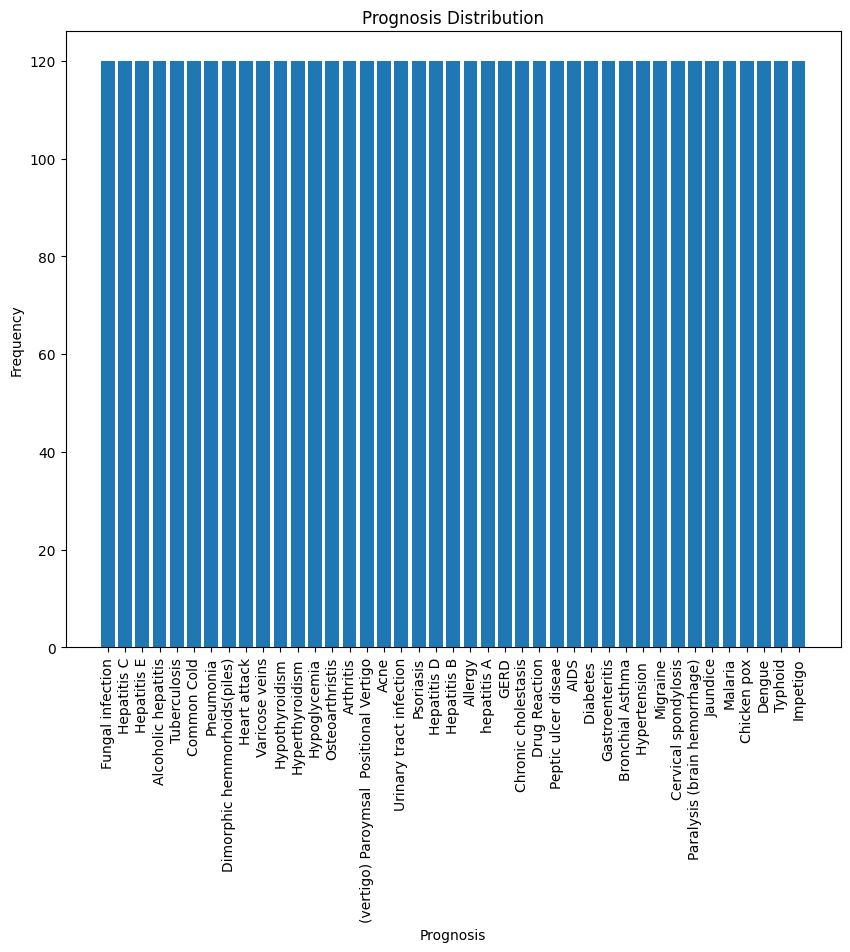

In [101]:
#bar plot--
#x-axis  = total_disease_count.index 
#y-axis  = total_disease_count

plt.figure(figsize=(10 , 8))
plt.bar(total_disease_count.index , total_disease_count)
plt.title('Prognosis Distribution')
plt.xlabel('Prognosis')
plt.ylabel('Frequency')
plt.xticks(rotation=90) 
plt.show()



#for observing bar all dataset set is balancing each value of disease is same 120


In [102]:
# Encoding the target value into numerical 
#using LabelEncoder 
#convert categorical to numerical

encoder = LabelEncoder() 
train_data["prognosis"] = encoder.fit_transform(train_data["prognosis"]) 
print(train_data['prognosis'])

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int32


In [103]:
# convert categorical to numerical using manually-

#disease_data = {'prognosis': ['Fungal infection', 'Hepatitis C ' , 'Hepatitis E' ,'Alcoholic hepatitis' ,'Tuberculosis ' ,'Common Cold ' ,'Pneumonia' ,'Dimorphic hemmorhoids(piles)' ,'Heart attack' ,'Varicose veins','Hypothyroidism','Hyperthyroidism','Hypoglycemia ','Osteoarthristis','Arthritis','(vertigo) Paroymsal  Positional Vertigo','Acne','Urinary tract infection','Psoriasis ','Hepatitis D ','Hepatitis B','Allergy ','hepatitis A  ','GERD','Chronic cholestasis ','Drug Reaction ','Peptic ulcer diseae','AIDS ','Diabetes ','Gastroenteritis','Bronchial Asthma','Hypertension ','Migraine','Cervical spondylosis','Paralysis (brain hemorrhage)','Jaundice','Malaria','Chicken pox','Dengue','Typhoid','Impetigo']}

#train_data = pd.DataFrame(disease_data)
#print(train_data)

In [104]:
#find dependent and independet variable for train dataset--

x_train = train_data.drop('prognosis' , axis = 1)
print("independent:",x_train)
y_train = train_data['prognosis']
print("dependent:",y_train)


independent:       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0     

In [105]:
#find correlation matrix for the independent variable
#correlation coefficient means relationship between variables

#Strong correlation -> if x increase the y aslo increase
# weak correlation -> if x increasse then y decrease
# strong positive ->
# strong negative ->
#weak posivite ->
#weak negative ->

correlation_matrix = round(x_train.corr() ,2)
correlation_matrix

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.00,0.32,0.33,-0.09,-0.06,-0.18,-0.16,0.20,-0.09,-0.06,...,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06
skin_rash,0.32,1.00,0.30,-0.09,-0.07,-0.03,0.17,0.16,-0.09,-0.07,...,0.32,0.32,0.32,0.33,0.33,0.33,0.33,0.33,0.33,0.33
nodal_skin_eruptions,0.33,0.30,1.00,-0.03,-0.02,-0.07,-0.06,-0.03,-0.03,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02
continuous_sneezing,-0.09,-0.09,-0.03,1.00,0.61,0.45,-0.09,-0.05,-0.05,-0.03,...,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03
shivering,-0.06,-0.07,-0.02,0.61,1.00,0.30,-0.06,-0.03,-0.03,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,-0.06,0.33,-0.02,-0.03,-0.02,-0.07,0.36,-0.03,-0.03,-0.02,...,-0.02,-0.02,-0.02,0.95,0.95,1.00,0.95,-0.02,-0.02,-0.02
inflammatory_nails,-0.06,0.33,-0.02,-0.03,-0.02,-0.07,0.36,-0.03,-0.03,-0.02,...,-0.02,-0.02,-0.02,0.95,0.95,0.95,1.00,-0.02,-0.02,-0.02
blister,-0.06,0.33,-0.02,-0.03,-0.02,-0.07,-0.06,-0.03,-0.03,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,1.00,0.95,0.95
red_sore_around_nose,-0.06,0.33,-0.02,-0.03,-0.02,-0.07,-0.06,-0.03,-0.03,-0.02,...,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.95,1.00,0.95


<Axes: >

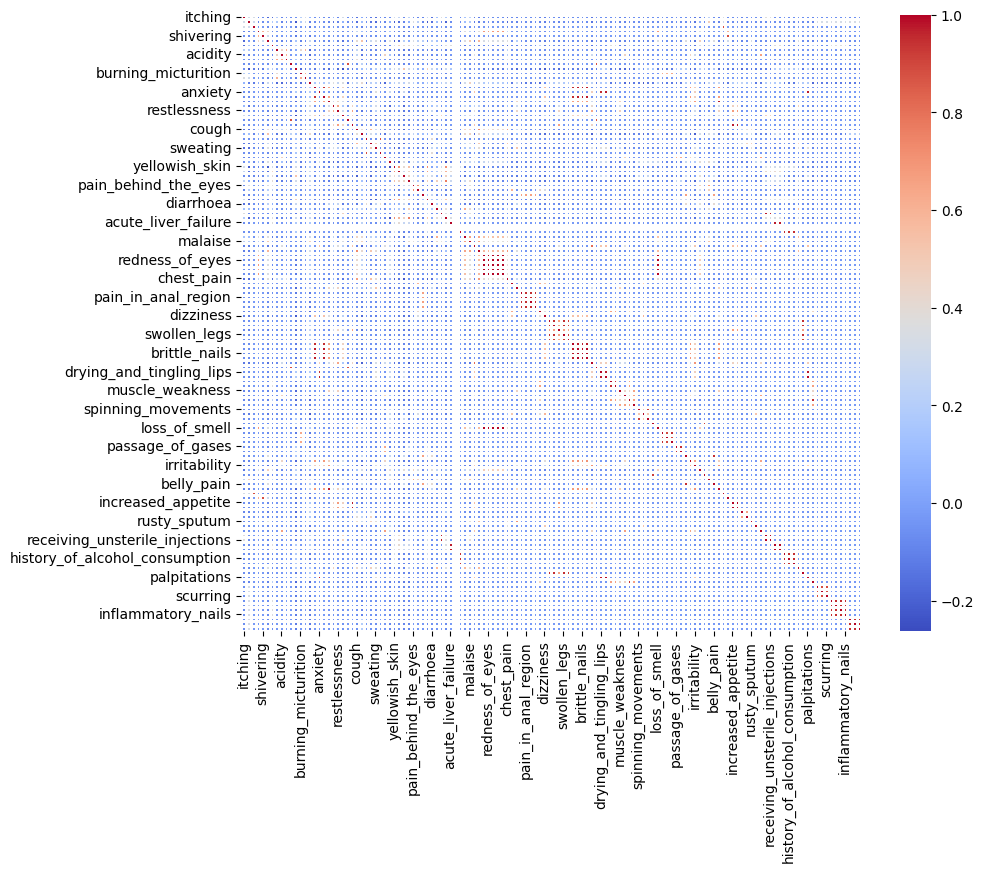

In [106]:
#plot heatmap
#used seaborn library to create a correlation heat map
#in heat map-> dark color indicates strong correlation
# annot= false -> value not display
#cmap -> indicate color low is blue and high is red

plt.figure(figsize=(10,8))
snb.heatmap(x_train.corr(),annot=False,linewidth=1 ,cmap ='coolwarm')

In [107]:
# Encoding the target value into numerical in test dataset
#value using LabelEncoder 

encoder = LabelEncoder() 
test_data["prognosis"] = encoder.fit_transform(test_data["prognosis"]) 

#print(test_data["prognosis"])

In [108]:
#find dependent and independet variable for test dataset--
x_test = test_data.drop('prognosis' , axis = 1)
#print("independent:",x_test)
y_test = test_data['prognosis']
#print("dependent:",y_test)

In [109]:
#splitting data into train and test data for given  train data set
print("x_train :" , x_train.shape)
print("y_train :" , y_train.shape)
print("x_test :" , x_test.shape)
print("y_test :" , y_test.shape)

x_train : (4920, 132)
y_train : (4920,)
x_test : (42, 132)
y_test : (42,)


In [110]:
#model Building
# 1.Naive byes
# 2. Random forest
# 3.Decision Tree

In [111]:
rf_model =  RandomForestClassifier(random_state=0) 
nb_model = GaussianNB()
dt_model =  DecisionTreeClassifier()

In [112]:
#used K -Fold methods
#handle overlap

# Initializing Models 
models = { 
    "Random Forest":RandomForestClassifier (),
    "Gaussian NB":GaussianNB(), 
    "Decision Tree": DecisionTreeClassifier()
} 
  
#cross validation score for the models 
# k = 5 ->  4920/5 = 984  --> for every cross validation -trainong data is =  4920 - 984 =3936 
#training data = 3936 and validation data = 984
 
for model_name in models: 
    model = models[model_name] 
    scores = cross_val_score(model, x_train, y_train, cv = 5)       
    print("  ")
    print(model_name) 
    print("Scores:", scores) 
    print("final Score:",np.mean(scores))  #this is final output of cross validation method


  
Random Forest
Scores: [1. 1. 1. 1. 1.]
final Score: 1.0
  
Gaussian NB
Scores: [1. 1. 1. 1. 1.]
final Score: 1.0
  
Decision Tree
Scores: [1. 1. 1. 1. 1.]
final Score: 1.0


In [113]:
from sklearn.metrics import f1_score
#F1 score = 2*(precision * recall / precision + recall)

# Calculate generalization error and F-score for each model

for model_name in models:
    model = models[model_name]
    model.fit(x_train, y_train)
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    generalization_error = train_accuracy - test_accuracy
    
    f1_train = f1_score(y_train, train_preds, average='macro')
    f1_test = f1_score(y_test, test_preds, average='macro')
    
    print("Model:", model_name)
    #print("Train Accuracy:", train_accuracy)
    #print("Test Accuracy:", test_accuracy)
    print("Generalization Error:", generalization_error)
    print("Train F-score:", f1_train)
    print("Test F-score:", f1_test)
    print()


Model: Random Forest
Generalization Error: 0.023809523809523836
Train F-score: 1.0
Test F-score: 0.9837398373983739

Model: Gaussian NB
Generalization Error: 0.0
Train F-score: 1.0
Test F-score: 1.0

Model: Decision Tree
Generalization Error: 0.023809523809523836
Train F-score: 1.0
Test F-score: 0.9837398373983739



In [114]:
#fit the seperate model on the entire training data

In [115]:
#random forest model:
rf_model =  RandomForestClassifier(random_state=0) 
rf_model = rf_model.fit(x_train, y_train)
rf_preds = rf_model.predict(x_test) 
print("rf_preds:" ,rf_preds)

rf_preds: [15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27  8]


In [116]:
#naive byes model"
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)
nb_preds = nb_model.predict(x_test) 
print("nb_preds:" ,nb_preds)


nb_preds: [15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27 15]


In [117]:
#decision tree model:
dt_model =  DecisionTreeClassifier()
dt_model =  dt_model.fit(x_train, y_train)
dt_preds = dt_model.predict(x_test) 
print("rf_preds:" ,dt_preds)

rf_preds: [15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27  8]


In [118]:
#actual accuracy is here
print("decision tree:" , accuracy_score(y_test , dt_preds))

print("naive byes:" , accuracy_score(y_test , nb_preds))

print("random forest:" , accuracy_score(y_test , rf_preds))

decision tree: 0.9761904761904762
naive byes: 1.0
random forest: 0.9761904761904762


In [119]:
print(y_test)

0     15
1      4
2     16
3      9
4     14
5     33
6      1
7     12
8     17
9      6
10    23
11    30
12     7
13    32
14    28
15    29
16     8
17    11
18    37
19    40
20    19
21    20
22    21
23    22
24     3
25    36
26    10
27    34
28    13
29    18
30    39
31    26
32    24
33    25
34    31
35     5
36     0
37     2
38    38
39    35
40    27
41    15
Name: prognosis, dtype: int32


In [120]:
#convert multiclass to binary
positive_class = 1

# y_test
y_test_binary = np.where(y_test == positive_class, 1, 0)
print("y_test_binary" , y_test_binary)

y_test_binary [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [121]:
#ROC AUC score
#0.5 = model performs no better than random guessing
#1.0 = perfect model
# 0.0  = wrong predict


In [147]:
#plot ROC curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

#plt.figure(figsize=(10, 8))  

for model_name, model in models.items(): 
    y_score = model.predict_proba(x_test)  # Predict probabilities for the test data for each model
    fpr, tpr, _ = roc_curve(y_test_binary, y_score[:, 1])  # Compute ROC curve for the model's predictions
    #plt.plot(fpr, tpr, label=f'{model_name}') 

# Plot the diagonal line (random guess)
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize plot appearance
#plt.xlim([0.0, 1.0])  # Limit x-axis range
#plt.ylim([0.0, 1.05])  # Limit y-axis range
#plt.xlabel('False Positive Rate') 
#plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic')
#plt.legend(loc="lower right")
#plt.show() 


In [141]:
print(fpr)
print(tpr)

[0. 0. 1.]
[0. 1. 1.]


Accuracy on Test dataset by the combined model
0.9761904761904762
 
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


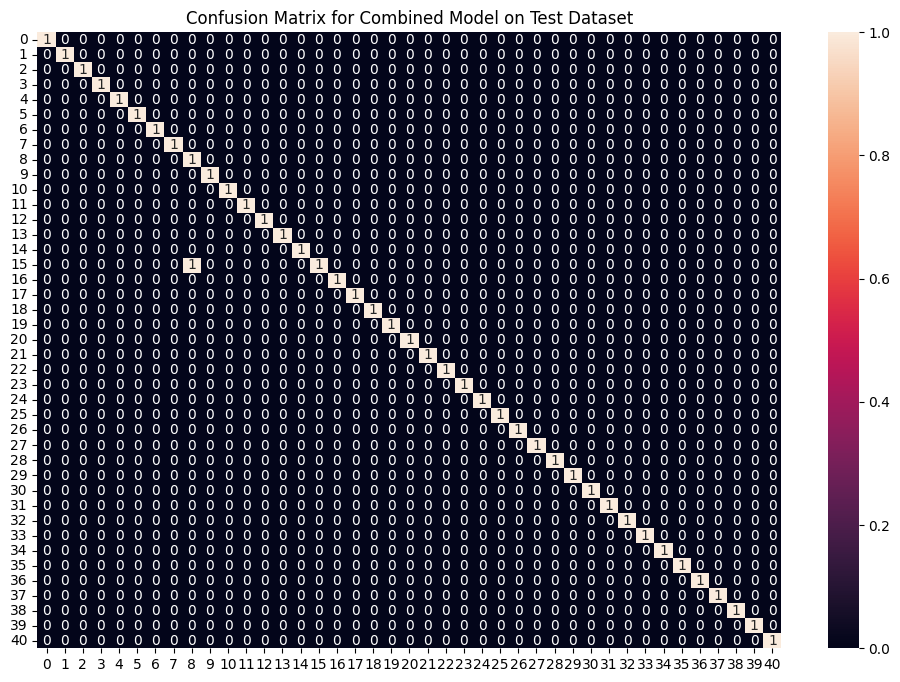

In [124]:

# Combining predictions from all classifiers
#final_preds = [np.argmax([i,j,k]) for i,j, k in zip(svm_preds, nb_preds, rf_preds)]

final_preds = [mode([i,j,k]) for i,j,k in zip( nb_preds, rf_preds, dt_preds)]

# Printing accuracy score
print('Accuracy on Test dataset by the combined model')
print(accuracy_score(y_test, final_preds)) 
print(" ")
# Calculating confusion matrix
cm = confusion_matrix(y_test, final_preds) 

print("Confusion Matrix:")
print(cm)


# Plotting confusion matrix
plt.figure(figsize=(12,8))   
snb.heatmap(cm , annot = True) 
plt.title("Confusion Matrix for Combined Model on Test Dataset") 
plt.show() 

In [125]:
import warnings

# Ignore warnings related to feature names
warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names")

In [126]:
#input test-----------and predict disease name

symptom_name= {'Itching': 0, 'Skin rash': 1, 'Nodal skin eruptions': 2, 'Continuous sneezing': 3, 'Shivering': 4, 'Chills': 5, 'Joint pain': 6, 'Stomach pain': 7, 'Acidity': 8, 'Ulcers on tongue': 9, 'Muscle wasting': 10, 'Vomiting': 11, 'Burning micturition': 12, 'Spotting  urination': 13, 'Fatigue': 14, 'Weight gain': 15, 'Anxiety': 16, 'Cold hands and feets': 17, 'Mood swings': 18, 'Weight loss': 19, 'Restlessness': 20, 'Lethargy': 21, 'Patches in throat': 22, 'Irregular sugar level': 23, 'Cough': 24, 'High fever': 25, 'Sunken eyes': 26, 'Breathlessness': 27, 'Sweating': 28, 'Dehydration': 29, 'Indigestion': 30, 'Headache': 31, 'Yellowish skin': 32, 'Dark urine': 33, 'Nausea': 34, 'Loss of appetite': 35, 'Pain behind the eyes': 36, 'Back pain': 37, 'Constipation': 38, 'Abdominal pain': 39, 'Diarrhoea': 40, 'Mild fever': 41, 'Yellow urine': 42, 'Yellowing of eyes': 43, 'Acute liver failure': 44, 'Fluid overload': 45, 'Swelling of stomach': 46, 'Swelled lymph nodes': 47, 'Malaise': 48, 'Blurred and distorted vision': 49, 'Phlegm': 50, 'Throat irritation': 51, 'Redness of eyes': 52, 'Sinus pressure': 53, 'Runny nose': 54, 'Congestion': 55, 'Chest pain': 56, 'Weakness in limbs': 57, 'Fast heart rate': 58, 'Pain during bowel movements': 59, 'Pain in anal region': 60, 'Bloody stool': 61, 'Irritation in anus': 62, 'Neck pain': 63, 'Dizziness': 64, 'Cramps': 65, 'Bruising': 66, 'Obesity': 67, 'Swollen legs': 68, 'Swollen blood vessels': 69, 'Puffy face and eyes': 70, 'Enlarged thyroid': 71, 'Brittle nails': 72, 'Swollen extremeties': 73, 'Excessive hunger': 74, 'Extra marital contacts': 75, 'Drying and tingling lips': 76, 'Slurred speech': 77, 'Knee pain': 78, 'Hip joint pain': 79, 'Muscle weakness': 80, 'Stiff neck': 81, 'Swelling joints': 82, 'Movement stiffness': 83, 'Spinning movements': 84, 'Loss of balance': 85, 'Unsteadiness': 86, 'Weakness of one body side': 87, 'Loss of smell': 88, 'Bladder discomfort': 89, 'Foul smell of urine': 90, 'Continuous feel of urine': 91, 'Passage of gases': 92, 'Internal itching': 93, 'Toxic look (typhos)': 94, 'Depression': 95, 'Irritability': 96, 'Muscle pain': 97, 'Altered sensorium': 98, 'Red spots over body': 99, 'Belly pain': 100, 'Abnormal menstruation': 101, 'Dischromic  patches': 102, 'Watering from eyes': 103, 'Increased appetite': 104, 'Polyuria': 105, 'Family history': 106, 'Mucoid sputum': 107, 'Rusty sputum': 108, 'Lack of concentration': 109, 'Visual disturbances': 110, 'Receiving blood transfusion': 111, 'Receiving unsterile injections': 112, 'Coma': 113, 'Stomach bleeding': 114, 'Distention of abdomen': 115, 'History of alcohol consumption': 116, 'Fluid overload.1': 117, 'Blood in sputum': 118, 'Prominent veins on calf': 119, 'Palpitations': 120, 'Painful walking': 121, 'Pus filled pimples': 122, 'Blackheads': 123, 'Scurring': 124, 'Skin peeling': 125, 'Silver like dusting': 126, 'Small dents in nails': 127, 'Inflammatory nails': 128, 'Blister': 129, 'Red sore around nose': 130, 'Yellow crust ooze': 131}

# Store the symptom name and prediction classes in dictionary
result = {
    "symptom_name": symptom_name,
    "predictions_classes": encoder.classes_  #Store the classes (disease names) from the encoder
}
#print(symptom_name)
#print(encoder.classes_)

#function to given valid input as an string
def preprocess_symptoms(symptom_string):
    
    # seperated symptoms into comma 
    input_symptoms = symptom_string.split(",")
    
    # Create an input data array filled with zeros
    input_data = np.zeros(len(result["symptom_name"]))

    # Set the corresponding index to 1 for each present symptom
    input_data = [1 if symptom.strip() in input_symptoms else 0 for symptom in result["symptom_name"]]

    #convert it into suitable format
    return np.array(input_data).reshape(1, -1)


# Function to predict disease based on input symptoms
def predict_disease(input_data):
    predictions = {}
    models = {
        "Random Forest": rf_model,
        "Naive Bayes": nb_model,
        "Decision Tree": dt_model
    }
    
    # Generate predictions from each model
    for model_name, actual_model in models.items():
        pred_index = actual_model.predict(input_data)[0]
        prediction = result["predictions_classes"][ pred_index]
        predictions[model_name] = prediction
    
    #count max prediction
    prediction_counts = {}
    for pred in predictions.values():
        if pred in prediction_counts:
            prediction_counts[pred] += 1
        else:
            prediction_counts[pred] = 1

    # Find the prediction with the highest count
    final_prediction = max(prediction_counts, key=prediction_counts.get)
    predictions["Final Prediction"] = final_prediction
    return predictions


In [127]:
# calculate presicion , recall , f1-score for evry model

nb_report = classification_report(y_test, nb_preds, target_names=result["predictions_classes"])
print("Naive Bayes:")
print(nb_report)
print()

# Random Forest classification report
rf_report = classification_report(y_test, rf_preds, target_names=result["predictions_classes"])
print("Random Forest t:")
print(rf_report)
print()

# Decision Tree classification report
dt_report = classification_report(y_test, dt_preds, target_names=result["predictions_classes"])
#print("Decision Tree :")
print(dt_report)


Naive Bayes:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
              

In [128]:
# Input and prediction
def give_input():
    while True:
        
        #symptom_string = input("Enter the symptoms:").strip()
        
        #symptom_string  = "Silver like dusting,Blackheads,Skin peeling ,Red sore around nose"
        
        #symptom_string="Fast heart rate,Chest pain ,Cramps ,Back pain"
        
        #symptom_string = "Cough with phlegm,Fever,Chills,,Fatigue " 
        
        #symptom_string ="Chest pain, pressure, tightness, crushing ,squeezing ,Pain or discomfort in one or both arms, the back, neck, jaw, or stomach,Shortness of breath,Nausea,Lightheadedness,Cold sweats"
        
        symptom_string ="Fever, chills,Cough,Shortness of breath or difficulty breathing  ,Fatigue,Headache,New loss of taste or smell,sore throat,Congestion or runny nose,Nausea or vomiting,Diarrhea" 
        
        if symptom_string:
            return symptom_string
        else:
            print("Please enter valid string : ")


symptom_string = give_input()
input_data = preprocess_symptoms(symptom_string)
predictions = predict_disease(input_data)

#print disease name--    
for key, value in predictions.items():
        print(f"{key}: {value}")

Random Forest: Bronchial Asthma
Naive Bayes: Bronchial Asthma
Decision Tree: Paralysis (brain hemorrhage)
Final Prediction: Bronchial Asthma
